# Patient Networks from	Genomic	Data

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx

In [24]:
gene_expression = pd.read_table("data/LUNG_Gene_Expression.tsv", index_col=False)

gene_expression.head()

,,TCGA-18-3406-01A-01R-1031-01,TCGA-18-3407-01A-01R-1031-01,TCGA-18-3408-01A-01R-1031-01,TCGA-18-3410-01A-01R-1031-01,TCGA-18-3411-01A-01R-1031-01,TCGA-18-3412-01A-01R-1031-01,TCGA-18-3414-01A-01R-1031-01,TCGA-18-3415-01A-01R-1031-01,TCGA-18-3416-01A-01R-1031-01,...,TCGA-66-2787-01A-01R-1031-01,TCGA-66-2788-01A-01R-1031-01,TCGA-66-2789-01A-01R-1031-01,TCGA-66-2790-01A-01R-1031-01,TCGA-66-2791-01A-01R-1031-01,TCGA-66-2792-01A-01R-1031-01,TCGA-66-2793-01A-01R-1199-01,TCGA-66-2794-01A-01R-1199-01,TCGA-66-2795-01A-02R-1031-01,TCGA-66-2800-01A-01R-1199-01
0,NTS,-0.806226,-0.382872,0.401741,-1.411283,0.753000,0.736499,0.884528,-0.658622,-1.364281,...,0.790486,1.034772,-0.702329,-1.199132,0.508934,0.970896,1.229138,0.112034,1.176520,0.344574
1,KRT14,1.479097,1.444322,-0.860771,-1.215284,0.393626,0.563601,0.050821,0.637788,-1.426153,...,-1.040541,1.419102,0.598151,-0.381585,0.993165,0.716151,-1.267115,-1.044408,0.583019,-0.377197
2,SPRR3,0.126642,1.202567,0.165575,-1.399032,-0.061173,1.229682,0.230877,1.055121,-0.371628,...,-0.214095,1.181017,0.221319,-1.700355,-0.028831,0.894141,-0.121553,0.651901,-0.190551,0.994301
3,KRT13,1.103173,1.163743,0.068945,-0.861872,-1.101405,1.458346,-0.456045,0.360896,0.478252,...,-0.505752,1.074723,0.184191,-0.222527,0.849239,0.838823,0.224248,0.346868,0.069941,-0.816551
4,UPK1B,-1.088276,-1.069109,0.674922,-1.130374,-1.070265,1.286183,1.492973,0.932590,0.047729,...,-0.859273,0.942833,0.586808,-0.725825,0.915616,1.189197,0.886122,1.345704,1.339203,1.064178


In [25]:
methylation = pd.read_table("data/LUNG_Methy_Expression.tsv", index_col=False)

methylation.head()

,,TCGA-18-3406-01A-01D-0979-05,TCGA-18-3407-01A-01D-0979-05,TCGA-18-3408-01A-01D-0979-05,TCGA-18-3410-01A-01D-0979-05,TCGA-18-3411-01A-01D-0979-05,TCGA-18-3412-01A-01D-0979-05,TCGA-18-3414-01A-01D-0979-05,TCGA-18-3415-01A-01D-0979-05,TCGA-18-3416-01A-01D-0979-05,...,TCGA-66-2787-01A-01D-0979-05,TCGA-66-2788-01A-01D-0979-05,TCGA-66-2789-01A-01D-0979-05,TCGA-66-2790-01A-01D-0979-05,TCGA-66-2791-01A-01D-0979-05,TCGA-66-2792-01A-01D-0979-05,TCGA-66-2793-01A-01D-1198-05,TCGA-66-2794-01A-01D-1198-05,TCGA-66-2795-01A-02D-0979-05,TCGA-66-2800-01A-01D-1198-05
0,cg21282997,1.071287,0.505985,0.170595,0.650579,-0.380839,0.225478,-0.092134,0.329674,-0.184091,...,0.617059,0.679720,0.406605,0.685374,0.906466,0.709070,1.311751,-0.179379,1.541894,-1.062804
1,cg12925542,-0.162920,0.278295,0.730791,0.169709,0.660348,0.044646,-0.799702,0.428928,0.889115,...,0.232462,0.192701,0.161300,0.228007,-0.193137,0.247088,0.294287,0.012780,1.211810,-0.029877
2,cg11552293,0.645327,0.283888,-1.205480,0.383766,-0.160650,-0.575899,-0.899864,1.385235,-0.282051,...,0.100664,0.255501,-0.321615,0.316424,0.995614,-0.483960,-1.205614,1.143363,-0.049149,-0.543236
3,cg14455991,0.276360,0.446255,0.269415,0.583517,0.694811,0.761933,-0.254650,-0.024985,2.339474,...,0.754686,0.224720,1.775797,0.300106,1.052667,0.639172,-0.015575,1.510636,-0.115225,0.527579
4,cg25481253,0.463753,-0.239356,-0.317994,-0.021257,-0.701361,-0.094727,-0.433297,0.138616,-0.198024,...,0.119508,-0.135268,-0.552039,-0.032952,0.257151,-0.007270,0.500277,-0.322799,0.439665,-0.845186


In [26]:
mirna = pd.read_table("data/LUNG_Mirna_Expression.tsv", index_col=False)

mirna.head()

,,TCGA-18-3406-01A-01T-0981-13,TCGA-18-3407-01A-01T-0981-13,TCGA-18-3408-01A-01T-0981-13,TCGA-18-3410-01A-01T-0981-13,TCGA-18-3411-01A-01T-0981-13,TCGA-18-3412-01A-01T-0981-13,TCGA-18-3414-01A-01T-0981-13,TCGA-18-3415-01A-01T-0981-13,TCGA-18-3416-01A-01T-0981-13,...,TCGA-66-2787-01A-01T-0981-13,TCGA-66-2788-01A-01T-0981-13,TCGA-66-2789-01A-01T-0981-13,TCGA-66-2790-01A-01T-0981-13,TCGA-66-2791-01A-01T-0981-13,TCGA-66-2792-01A-01T-0981-13,TCGA-66-2793-01A-01T-1517-13,TCGA-66-2794-01A-01T-1517-13,TCGA-66-2795-01A-02T-0981-13,TCGA-66-2800-01A-01T-1517-13
0,hsa-let-7a-1,2.766139,0.510633,2.060634,0.424424,0.292791,0.448047,3.124130,1.014758,-0.126167,...,0.437797,0.183223,0.053349,0.328862,0.430933,0.040348,-0.687801,0.196365,0.520870,1.551996
1,hsa-let-7a-2,2.718831,0.514435,2.071900,0.402256,0.277827,0.565700,3.094992,0.994815,-0.135827,...,0.411888,0.118006,0.073525,0.244412,0.345755,0.031369,-0.753868,0.233260,0.480447,1.637500
2,hsa-let-7a-3,2.790086,0.522841,2.128157,0.452716,0.303196,0.532852,3.009640,1.010618,-0.150384,...,0.330441,0.209703,0.043034,0.263768,0.431415,0.086242,-0.671504,0.183699,0.411438,1.593433
3,hsa-let-7b,1.781850,-0.253948,0.651481,-0.629939,-0.708643,-0.195938,4.282568,0.851450,-0.495568,...,-0.228155,-0.334590,-0.496064,-0.582768,-0.125448,-0.128656,-0.683957,-0.108657,0.662945,1.422312
4,hsa-let-7c,-0.278198,-0.344832,-0.562593,2.625320,-0.558303,-0.545406,0.920278,-0.656212,-0.583673,...,-0.668690,-0.700178,1.274779,0.251088,-0.605614,-0.512721,5.708583,0.308517,-0.695127,0.002374


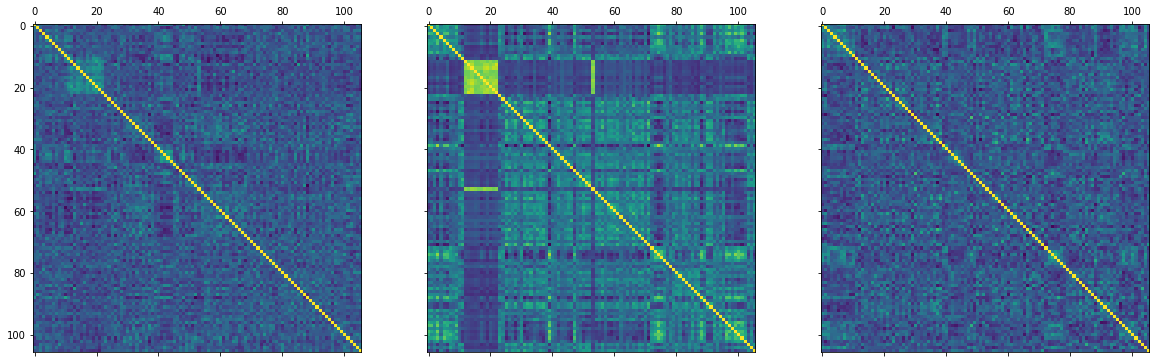

In [58]:
figure, axes = plt.subplots(1, 3, sharey=True, figsize=(20, 15))

axes[0].matshow(gene_expression.corr())
axes[1].matshow(methylation.corr())
axes[2].matshow(mirna.corr())

plt.show()

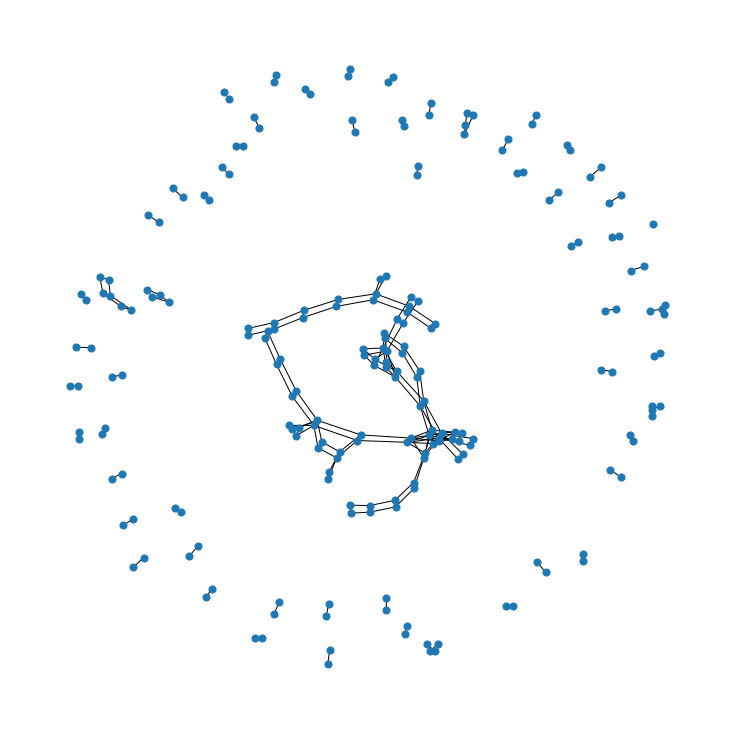

In [98]:
graph = networkx.Graph()

for i, column in enumerate(gene_expression.columns):
    graph.add_node(column)

for i, row in gene_expression.corr().iterrows():
    for j, correlation in enumerate(row):
        if correlation > 0.3:
            graph.add_edge(i, j, weight=correlation)

plt.figure(figsize=(10, 10)) 

networkx.draw(graph, node_size=50)